# An Introduction to the NLTK
Source: 😊[Day 12 - Special Data Types: Natural Language Processing](https://github.com/core-skills/12-text-processing) *repository*

**Overview**: This notebook introduces the Python Natural Langauge Toolkit (*NLTK*). The NLTK is a set of modules and corpora that support natural langauge processing against a corpus of one or more texts (sentences, paragraphs, ...). This notebook only touches the surface of the capabilities of NLTK and is intended to provide a view of traditional text wrangling, pre-processing and analysis techniques. However, the NLTK is capable of both machine learning and text mining.

Note:
- *Quoted texts are derived from the respective topics Wikipedia page*
- Corpora accessed via NLTK is accessed under the The Project Gutenberg License

## Table of Contents
1. [Tokenization](#tokenization)
2. [Stop Words](#stop_words)
3. [Feature distributions](#feature_distributions)
4. [N-grams](#ngrams)
5. [Stemming](#stemming)
6. [Concordancing](#concordancing)
7. [Dispersion Plotting](#dispersion_plotting)
8. [Bi-gram Signifiance](#bigram_significance)
9. [Word contexts](#word_contexts)
10. [Word similarities](#word_similarities)
11. [Parts-of-Speech (POS)](#part_of_speech)
12. [Named entity extraction](#named_entity_recognition)

### Import Dependencies
- [nltk](https://www.nltk.org/) - library that we will use to explore natural language

In [1]:
import nltk
from nltk.corpus import stopwords, reuters
from nltk.stem import PorterStemmer

In [3]:
# Download NLTK corpora
nltk.download('gutenberg')
nltk.download('reuters')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\22917746\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\22917746\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

### Load text corpora
There are two types of text data (*corpora*) that can be used within this notebook. The first is the novel `shakespeare-hamlet` and the second is a selection of news articles provided by Reuters on the topic of `gold`.

In [14]:
corpus_type = 'shakespeare' # gold

In [15]:
if corpus_type == 'shakespeare':
    corpus = " ".join(nltk.corpus.gutenberg.words('shakespeare-hamlet.txt'))
elif corpus_type == 'gold':
    corpus = " ".join(reuters.words(reuters.fileids('gold')))
else:
    print('Please check the data type you specified as it is incorrect')
    raise ValueError

In [18]:
# View corpus
print(corpus[:250])

[ The Tragedie of Hamlet by William Shakespeare 1599 ] Actus Primus . Scoena Prima . Enter Barnardo and Francisco two Centinels . Barnardo . Who ' s there ? Fran . Nay answer me : Stand & vnfold your selfe Bar . Long liue the King Fran . Barnardo ? B


## Fundamentals of Natural Language Processing - Wrangling, Pre-processing and Analysis

### Tokenization <a name="tokenization"></a>

> Tokenization is the process of demarcating and possibly classifying sections of a string of input characters. The resulting tokens are then passed on to some other form of processing.

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/tokenization.png)

[analyticsvidhya](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/tokenization.png)

We use the pre-trained [Punkt](https://www.nltk.org/_modules/nltk/tokenize/punkt.html) tokenizer made available with NLTK. This tokenizer is generated via unsupervised learning on a large corpus of texts. There are many more pre-trained tokenizers available covering a broad range of tokenization techniques such as character tokenization, byte-pair encoding, sub-word, etc.

In [19]:
# Load NLTK tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\22917746\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Tokenize the corpus into features (words) and display 10 of them
features = nltk.word_tokenize(corpus)
print(features[:10])

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']']


In [22]:
# Normalize the features to lower case and exclude punctuation and display 10 of them
features = [feature for feature in features if feature.isalpha()]
features = [feature.lower() for feature in features]
print(features[:10])

['the', 'tragedie', 'of', 'hamlet', 'by', 'william', 'shakespeare', 'actus', 'primus', 'scoena']


### Stop Words <a name="stop_words"></a>

> Stop words usually refers to the most common words in a language, there is no single universal list of stop words"

![alt text](https://www.socialtalent.com/wp-content/uploads/2016/09/Screen-Shot-2016-09-01-at-15.01.32.png)

Similar to Punkt, the NLTK also has a resource containing common stopwords. Stopwords are domain and language specific, hence the stop words in English will be different to those in Japanese or those used in the resources industry.

In [24]:
# Load NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\22917746\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Create a list of (English) stopwords
stopwords = stopwords.words('english')

In [26]:
# View a few stopwords
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [29]:
# Remove stopwords from our set of linguistic features
features = [feature for feature in features if feature not in stopwords]
print(features[:10])

['tragedie', 'hamlet', 'william', 'shakespeare', 'actus', 'primus', 'scoena', 'prima', 'enter', 'barnardo']


### Feature (word) distribution <a name="feature_distributions"></a>

As mentioned in the previous section, there may be stopwords that are corpora specific e.g. due to the language used and its context. We can generate feature distributions over the words in our corpus to check whether we can remove more stopwords. Typically, stopwords occur very frequently and add little contextual information to the text of interest. Conversely, natural language follows a [Zipian distribution](https://en.wikipedia.org/wiki/Zipf%27s_law) where most words are rare. Rare words that occur with a frequency of 1 are referred to as **hapaxes**. Hapaxes are of interest because their removal from a languages vocabulary can aid in NLP.

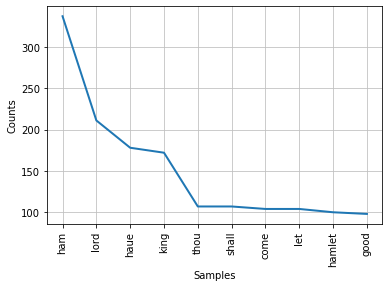

In [30]:
# Count & tabulate the features, and then plot the results
frequencies = nltk.FreqDist(features)
plot = frequencies.plot(10)

In [42]:
# Create a list of unique words (hapaxes; occur only once) and display them
hapaxes = frequencies.hapaxes()
print("\n".join([f'{idx+1}. {word}\t({frequencies[word]})' for idx, word in enumerate(hapaxes[:10])]))

1. william	(1)
2. shakespeare	(1)
3. primus	(1)
4. scoena	(1)
5. prima	(1)
6. centinels	(1)
7. carefully	(1)
8. strook	(1)
9. releefe	(1)
10. stirring	(1)


### N-grams <a name="ngrams"></a>

>An n-gram is a contiguous sequence of n items from a given sample of text or speech.

![alt text](https://images.deepai.org/glossary-terms/867de904ba9b46869af29cead3194b6c/8ARA1.png)

[deepai](https://images.deepai.org/glossary-terms/867de904ba9b46869af29cead3194b6c/8ARA1.png)

In [ ]:
# Similar to before, let's compute the frequencies of bi-grams (word pairs)
# Count & tabulate ngrams from the features.
ngrams = nltk.ngrams(features, 2)
frequencies = nltk.FreqDist(ngrams)

# Show the most common bi-grams
frequencies.most_common(10)

In [ ]:
# Create a list each token's length, and plot the result; How many "long" words are there?
lengths = [len(feature) for feature in features]
plot = nltk.FreqDist(lengths).plot(10)

### Stemming <a name="stemming"></a>

**Stemming:** "stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form."

![alt text](https://kavita-ganesan.com/wp-content/uploads/2019/02/Screen-Shot-2019-02-15-at-2.01.37-PM.png)

[kavita ganesan](https://kavita-ganesan.com/wp-content/uploads/2019/02/Screen-Shot-2019-02-15-at-2.01.37-PM.png)

In [ ]:
# Initialize a stemmer, stem the features, count & tabulate, and output
stemmer = PorterStemmer()
stems = [stemmer.stem(feature) for feature in features]
frequencies = nltk.FreqDist(stems)
frequencies.most_common(10)

## Preparing text
For the next section of this notebook, we need to recreate our text into features and conver them into an NLTK 'Text' object. This allows us to do concordancing and other interesting things.

In [ ]:
# Re-create the features and create a NLTK Text object, so other cool things can be done
features = nltk.word_tokenize(data)
text = nltk.Text(features)

In [ ]:
# Count & tabulate, again; list a given word -- try different words!
# If you're using shakespeare data - try Lord
# If you're using gold data - try Perth
frequencies = nltk.FreqDist(text)
print(frequencies['Lord'])

### Concordancing <a name="concordancing"></a>

Cordandancing: "A concordance is an alphabetical list of the principal words used in a book or body of work, listing every instance of each word with its immediate context."

![alt text](https://orange3-text.readthedocs.io/en/latest/_images/Concordance-stamped.png)

[orange3](https://orange3-text.readthedocs.io/en/latest/_images/Concordance-stamped.png)

In [ ]:
# Do keyword-in-context searching against the text (concordancing)
# If you're using shakespeare data - try Lord
# If you're using gold data - try Perth
print(text.concordance('Lord'))

### Dispersion Plot <a name="dispersion_plotting"></a>

A method for displaying lexical dispersion.

In [ ]:
# Create a dispersion plot of given words
# If you're using shakespeare data - try ['Lord', 'King', 'Ham']
# If you're using gold data - try ['Perth', 'Australia', 'Adelaide', 'Gold']
plot = text.dispersion_plot(['Lord', 'King', 'Ham'])

### Bi-gram significance <a name="bigram_significance"></a>

Determine which bi-grams are the most significant considering a defined window size.

> Collocations are expressions of multiple words which commonly co-occur.

In [ ]:
# output the "most significant" bigrams, considering surrounding words (size of window) -- Try different window sizes.
text.collocation_list(num=10, window_size=4)

### Common word context <a name="word_contexts"></a>

Common word contexts allows us to examine the contexts that are shared by two or more words

In [ ]:
# Given a set of words, what words are nearby
# If you're using shakespeare data - try ['Lord', 'King']
# if you're using gold data - try ['Mine', 'Gold']
text.common_contexts(['Lord', 'King'])

### Word similarities <a name="word_similarities"></a>

What words are similar to each other?
This implementation should be remembered when we look at *word embeddings*. 

The method that is implemented by NLTK is "Distributional similarity: find other words which appear in the same contexts as the specified word."

In [ ]:
# List the words (features) most associated with the given word
# If you're using Shakespeare data - Try Lord
# If you're using gold data - Try Gold
text.similar('King')

In [ ]:
# create a list of sentences, and display one -- season to taste
sentences = nltk.sent_tokenize(data)
sentence  = sentences[14]
print(sentence)

### Parts-of-speech (POS) <a name="part_of_speech"></a>

**POS:** "part of speech is a category of words (or, more generally, of lexical items) that have similar grammatical properties. Words that are assigned to the same part of speech generally display similar syntactic behavior—they play similar roles within the grammatical structure of sentences—and sometimes similar morphology in that they undergo inflection for similar properties."

![alt text](https://1.bp.blogspot.com/-spGNcdlw7g4/XHY5fS25uVI/AAAAAAAABqY/63lfyQFHkl4rf1ls0vvLIBRRc8TEsBZvgCLcBGAs/s640/Capture.PNG)

[thinkifi](https://1.bp.blogspot.com/-spGNcdlw7g4/XHY5fS25uVI/AAAAAAAABqY/63lfyQFHkl4rf1ls0vvLIBRRc8TEsBZvgCLcBGAs/s640/Capture.PNG)

In [ ]:
# Import perceptron tagger
# POS is a supervised learning process so we need to load in a ML model to aid us.
nltk.download('averaged_perceptron_tagger')

In [ ]:
# Tokenize the sentence and parse it into parts-of-speech, all in one go.
sentence = nltk.pos_tag(nltk.word_tokenize(sentence))
print(sentence)

### Named entity extraction <a name="named_entity_recognition"></a> 

**Chunking:** "Chunking is a process of extracting phrases from unstructured text."<br>

![alt text](https://www.tutorialkart.com/wp-content/uploads/2017/06/chunker_ex.png)

[tutorialkart](https://www.tutorialkart.com/wp-content/uploads/2017/06/chunker_ex.png)

In [ ]:
# Import chunker and wordlist corpus
nltk.download('maxent_ne_chunker')
nltk.download('words')

In [ ]:
# Extract named enities from a sentence, and print the results
# chunking
entities = nltk.ne_chunk(sentence)
print(entities)

### Visualisation Tree

Output the entities graphically. Currently doesn't work in Google Colab, however the image shown is similar to what would be expected.

In [ ]:
# entities

![Entity Tree](https://www.nltk.org/book/tree_images/ch07-tree-2.png)

[NLTK](https://www.nltk.org/book/tree_images/ch07-tree-2.png)

This is the end of the Notebook. I hope you found it useful.